<a href="https://colab.research.google.com/github/sayuri-sam/mlta2_bmkg4/blob/master/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Weather/BMKG
# kelompok BMKG_4

### Tahap Eksplorasi data


In [1]:
from datetime import datetime, timedelta
import time
from collections import namedtuple
import pandas as pd
import requests

In [2]:
import os.path

In [3]:
#from google.colab import drive
#rive.mount('/content/drive')
#%cd /content/drive/MyDrive/Colab Notebooks/demo_day/mlta2_bmkg4

In [4]:
dataset_path="openweatherdata-denpasar-1990-2020.csv"

dataset2_path="openweatherdata-denpasar-1990-2020v0.1.csv"

In [5]:
dataset2 = pd.read_csv(dataset2_path)
dataset2

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264919,1/7/2020 19:00,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,94,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264920,1/7/2020 20:00,28800,Denpasar,-8.652497,115.219117,27.00,27.00,27.00,1007.0,94,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264921,1/7/2020 21:00,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,83,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264922,1/7/2020 22:00,28800,Denpasar,-8.652497,115.219117,28.00,28.00,28.00,1007.0,83,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n


### Penjelasan Dataset

Dataset yang kami gunakan adalah data cuaca di kota Denpasar Provinsi Bali
secara geografis provinsi bali terletak di zona waktu WITA atau Middle Indonesia Time (MIT) atau UTC +8

<img src="map_denpasar.png">

### Date time Preporcessing

terdapat 2 versi dataset. pada dataset yang pertama format date time masih dalam UNIX fromat 
sehingga harus di konversi ke format ISO agar lebih mudah dibaca
versi dataset kedua sudah memiliki date time dengan format ISO sehingga bisa langsung digunakan

In [6]:
dataset2.head(100)

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1/4/1990 23:00,28800,Denpasar,-8.652497,115.219117,27.15,27.15,27.15,1007.0,85,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
96,1/5/1990 0:00,28800,Denpasar,-8.652497,115.219117,27.40,27.40,27.40,1008.0,84,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d
97,1/5/1990 1:00,28800,Denpasar,-8.652497,115.219117,27.55,27.55,27.55,1008.0,82,...,NaN,NaN,NaN,NaN,NaN,100,500,Rain,light rain,10d
98,1/5/1990 2:00,28800,Denpasar,-8.652497,115.219117,27.75,27.75,27.75,1009.0,81,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04d


In [7]:
dataset2.dtypes

dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
temp_min               float64
temp_max               float64
pressure               float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
rain_6h                float64
rain_12h               float64
rain_24h               float64
rain_today             float64
snow_1h                float64
snow_3h                float64
snow_6h                float64
snow_12h               float64
snow_24h               float64
snow_today             float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [8]:
pd.set_option('display.max_columns', None)
dataset2.tail(5)

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,snow_1h,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
264919,1/7/2020 19:00,28800,Denpasar,-8.652497,115.219117,27.0,27.0,27.0,1007.0,94,4.1,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264920,1/7/2020 20:00,28800,Denpasar,-8.652497,115.219117,27.0,27.0,27.0,1007.0,94,5.7,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264921,1/7/2020 21:00,28800,Denpasar,-8.652497,115.219117,28.0,28.0,28.0,1007.0,83,6.7,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
264922,1/7/2020 22:00,28800,Denpasar,-8.652497,115.219117,28.0,28.0,28.0,1007.0,83,6.2,290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
264923,1/7/2020 23:00,28800,Denpasar,-8.652497,115.219117,28.0,28.0,28.0,1008.0,83,5.7,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d


In [9]:
print(dataset2.var().round(2))

timezone          0.00
lat               0.00
lon               0.00
temp              3.85
temp_min          3.89
temp_max          3.96
pressure          5.23
humidity         76.04
wind_speed        3.65
wind_deg       7225.01
rain_1h           0.46
rain_3h         128.99
rain_6h          58.16
rain_12h      13603.93
rain_24h        442.74
rain_today         NaN
snow_1h            NaN
snow_3h            NaN
snow_6h            NaN
snow_12h           NaN
snow_24h           NaN
snow_today         NaN
clouds_all      621.51
weather_id    15697.03
dtype: float64


C:\Users\dicky.surya\AppData\Local\Temp\ipykernel_3828\849087991.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(dataset2.var().round(2))


In [10]:
print('data shape',dataset2.shape)
print('----------is Not Null-------------')
print(dataset2.count())
print('---------------Is Null---------------')
print(dataset2.isna().sum())


data shape (264924, 29)
----------is Not Null-------------
dt_iso                 264924
timezone               264924
city_name              264924
lat                    264924
lon                    264924
temp                   264924
temp_min               264924
temp_max               264924
pressure               264924
humidity               264924
wind_speed             264924
wind_deg               264924
rain_1h                 16286
rain_3h                 16156
rain_6h                 36098
rain_12h                   12
rain_24h                 6817
rain_today                  0
snow_1h                     0
snow_3h                     0
snow_6h                     0
snow_12h                    0
snow_24h                    0
snow_today                  0
clouds_all             264924
weather_id             264924
weather_main           264924
weather_description    264924
weather_icon           264924
dtype: int64
---------------Is Null---------------
dt_iso              

## Cleansing
### drop NA column (un used column)

Hasil analisis variance di atas ada beberapa kolom yang tidak memiliki variance atau variance = 0, sehingga kami asumsikan data tersebut data statis yang tidak digunakan dalam analisis.
kami melakukan drop/delete kolom-kolom tersebut. 
selain itu juga terdapat kolom dengan value NaN di semua barisnya. kolom tersebut juga di keluarkan dari analisis

In [11]:
dataset2 = dataset2.drop(['timezone','city_name','lat','lon','snow_1h', 'snow_3h', 'snow_6h', 'snow_12h', 'snow_24h', 'snow_today','rain_today'
                         
                         ],axis=1)
dataset2.head()

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,27.04,27.04,27.04,1010.0,82,1.71,274,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d


In [12]:
dataset2.shape

(264924, 18)

## Visualise

Visualisasi data yang potential digunakan untuk analisis . dalam visualisasi ini label yang digunakan adalah yang terdapat pada kolom "weather_main"

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
viz1 = dataset2[['dt_iso','temp','temp_min','temp_max','pressure','humidity','wind_speed','wind_deg','clouds_all','weather_main']]
viz1

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main
0,1/1/1990 0:00,25.82,25.82,25.82,1010.0,86,1.36,225,98,Rain
1,1/1/1990 1:00,26.20,26.20,26.20,1011.0,84,2.09,247,91,Rain
2,1/1/1990 2:00,26.45,26.45,26.45,1011.0,84,2.44,262,94,Rain
3,1/1/1990 3:00,26.80,26.80,26.80,1011.0,82,2.29,271,94,Rain
4,1/1/1990 4:00,27.04,27.04,27.04,1010.0,82,1.71,274,76,Clouds
...,...,...,...,...,...,...,...,...,...,...
264919,1/7/2020 19:00,27.00,27.00,27.00,1007.0,94,4.10,300,75,Clouds
264920,1/7/2020 20:00,27.00,27.00,27.00,1007.0,94,5.70,300,75,Clouds
264921,1/7/2020 21:00,28.00,28.00,28.00,1007.0,83,6.70,290,75,Clouds
264922,1/7/2020 22:00,28.00,28.00,28.00,1007.0,83,6.20,290,40,Clouds


In [15]:
viz1['weather_main'].value_counts()

Clouds          220657
Rain             34901
Thunderstorm      4724
Clear             3941
Haze               548
Mist                74
Smoke               29
Fog                 16
Dust                10
Tornado              8
Drizzle              8
Squall               4
Ash                  4
Name: weather_main, dtype: int64

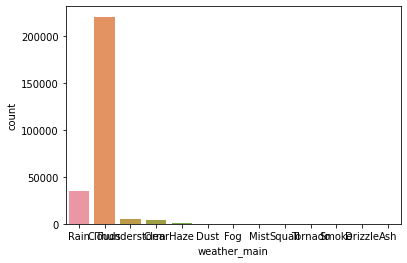

In [16]:
sns.countplot(data=viz1, x='weather_main')

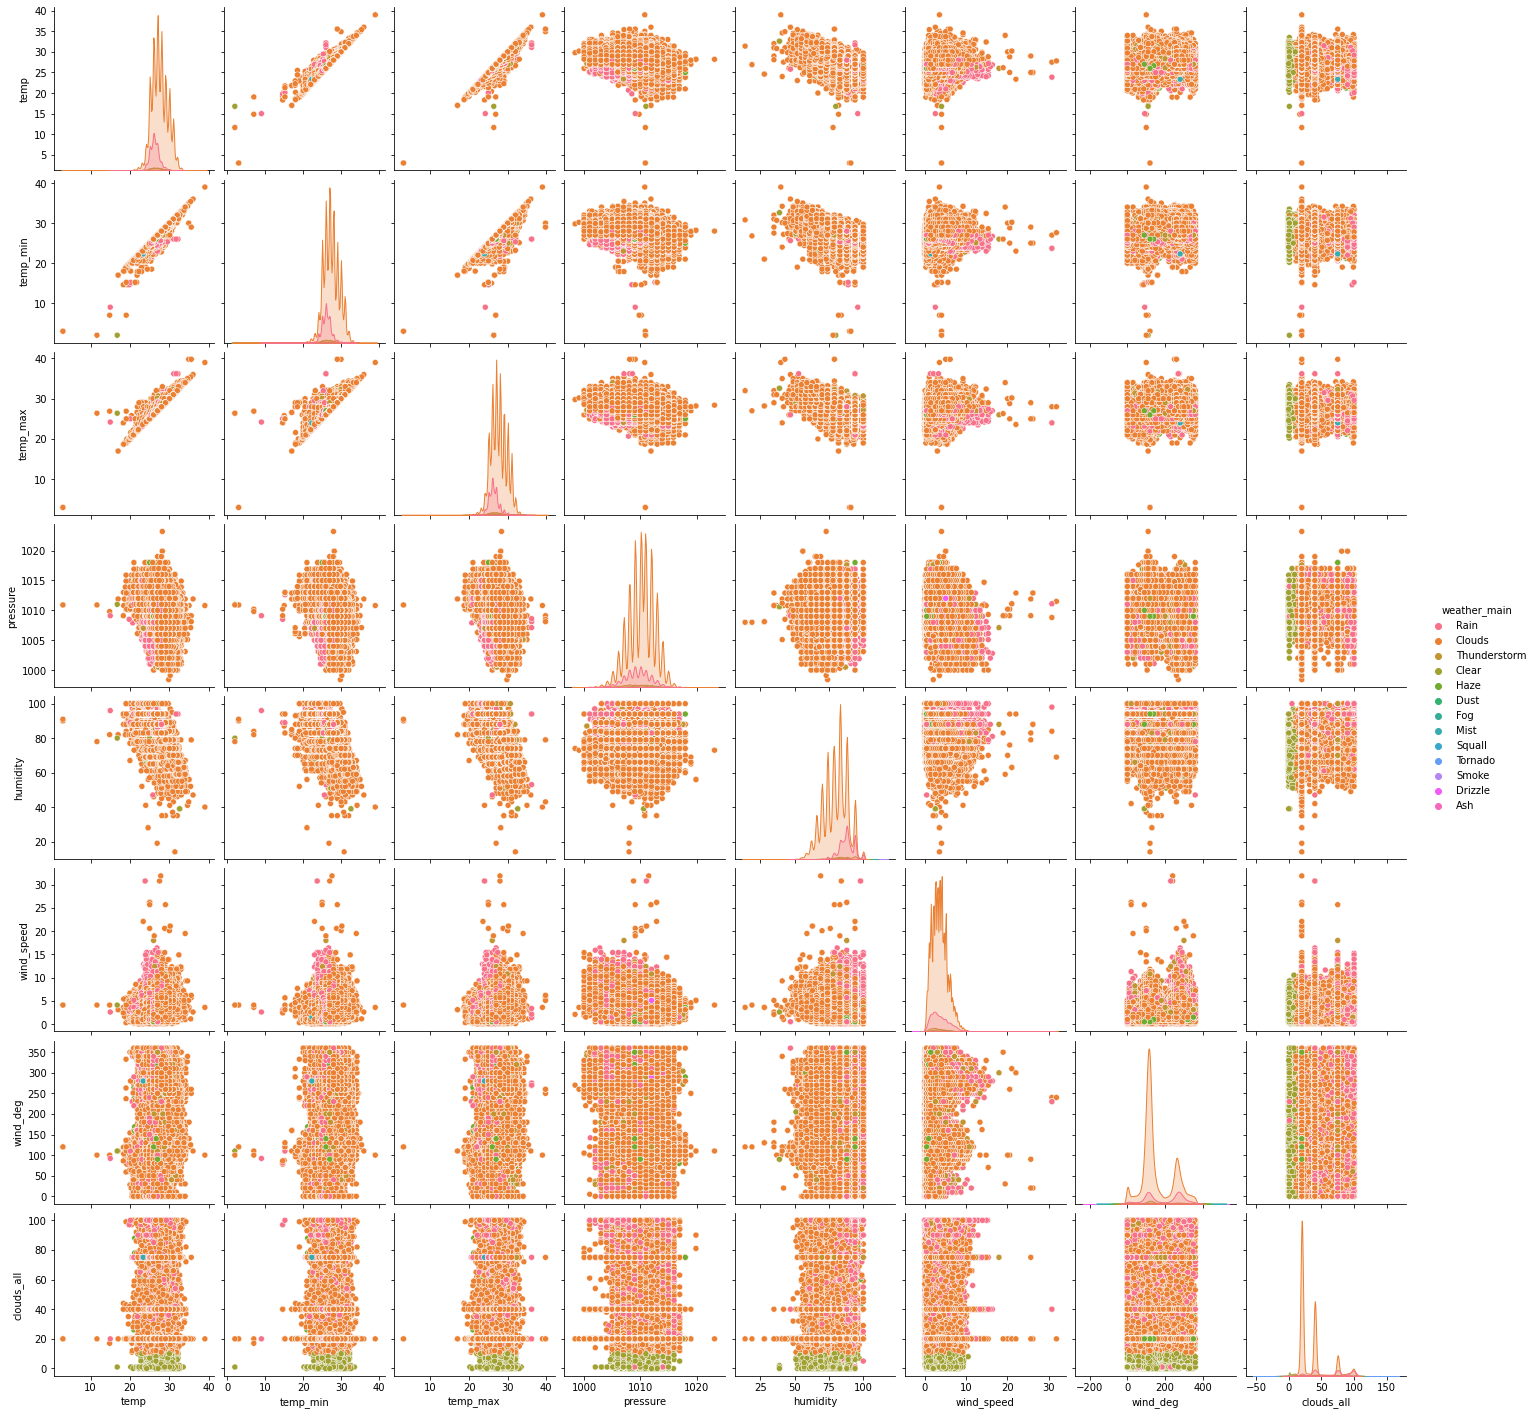

In [ ]:
#viz = sns.load_dataset("viz1")
sns.pairplot(viz1, hue='weather_main')

In [17]:
weather_main_list= dataset2['weather_main'].unique().tolist()
weather_id_list= dataset2['weather_id'].unique().tolist()

print(weather_main_list)
print(weather_id_list)
print('-----------count-----------')
print("count weather main = ", len(weather_main_list))
print("count weather id = ", len(weather_id_list))

['Rain', 'Clouds', 'Thunderstorm', 'Clear', 'Haze', 'Dust', 'Fog', 'Mist', 'Squall', 'Tornado', 'Smoke', 'Drizzle', 'Ash']
[500, 803, 804, 501, 502, 801, 802, 211, 800, 721, 201, 202, 503, 761, 521, 741, 701, 771, 781, 711, 520, 522, 300, 200, 210, 212, 301, 762]
-----------count-----------
count weather main =  13
count weather id =  28


Kami memutuskan menggunakan weather_main sebagai target label

### Data Preprocessing 

#### Encode target label

In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
dataset2_test = dataset2

ord_enc = OrdinalEncoder()
dataset2_test["weather_main_code"] =ord_enc.fit_transform(dataset2[['weather_main']])

print(dataset2_test['weather_main_code'].unique())

[ 8.  2. 11.  1.  6.  4.  5.  7. 10. 12.  9.  3.  0.]


In [21]:
dataset2_test

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,rain_6h,rain_12h,rain_24h,rain_today,clouds_all,weather_id,weather_main,weather_description,weather_icon,weather_main_code
0,1/1/1990 0:00,25.82,25.82,25.82,1010.0,86,1.36,225,0.49,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d,8.0
1,1/1/1990 1:00,26.20,26.20,26.20,1011.0,84,2.09,247,0.13,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d,8.0
2,1/1/1990 2:00,26.45,26.45,26.45,1011.0,84,2.44,262,0.24,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d,8.0
3,1/1/1990 3:00,26.80,26.80,26.80,1011.0,82,2.29,271,0.23,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d,8.0
4,1/1/1990 4:00,27.04,27.04,27.04,1010.0,82,1.71,274,NaN,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264919,1/7/2020 19:00,27.00,27.00,27.00,1007.0,94,4.10,300,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n,2.0
264920,1/7/2020 20:00,27.00,27.00,27.00,1007.0,94,5.70,300,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n,2.0
264921,1/7/2020 21:00,28.00,28.00,28.00,1007.0,83,6.70,290,NaN,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n,2.0
264922,1/7/2020 22:00,28.00,28.00,28.00,1007.0,83,6.20,290,NaN,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n,2.0


#### Agar prosesnya lebih cepat data yg diambil adalah data 10 tahun terakhir mulai 01/01/2010

In [22]:
dt_trunc = dataset2_test.iloc[176208:]

df=dt_trunc[['dt_iso', 'temp', 'temp_min', 'temp_max', 'pressure','humidity', 'wind_speed', 'wind_deg','weather_main_code']]


Text(0.5, 1.0, 'Wind Speed')

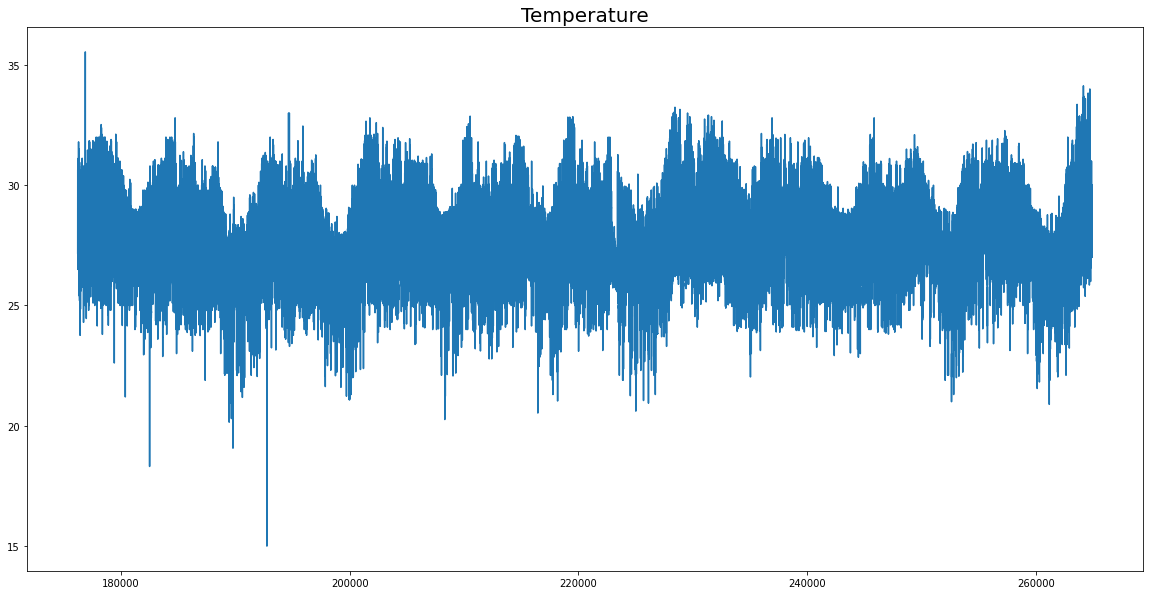

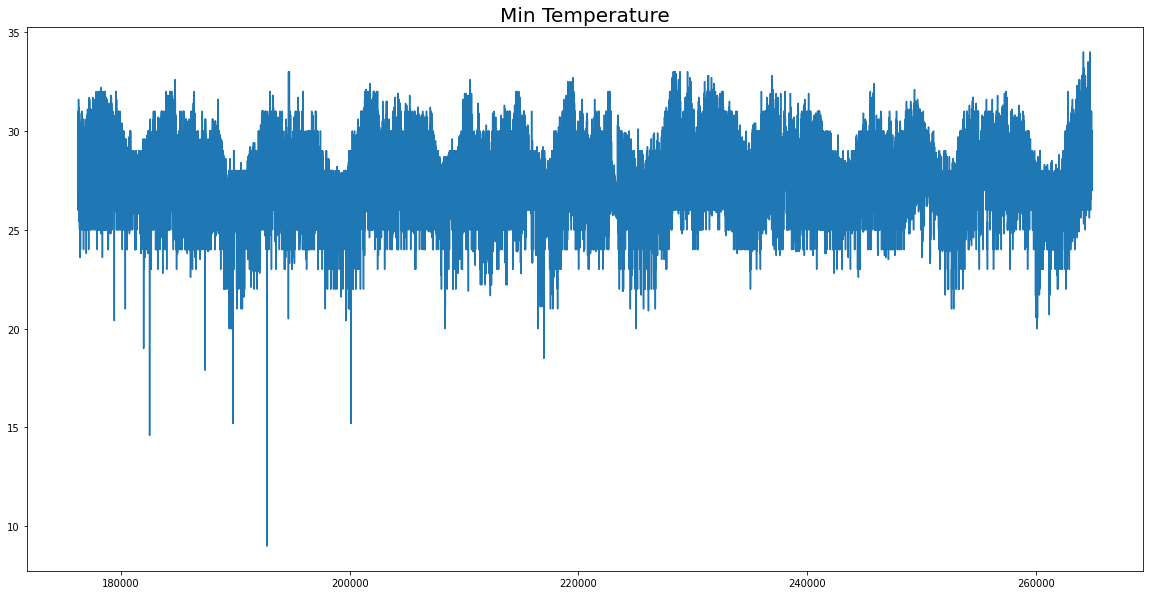

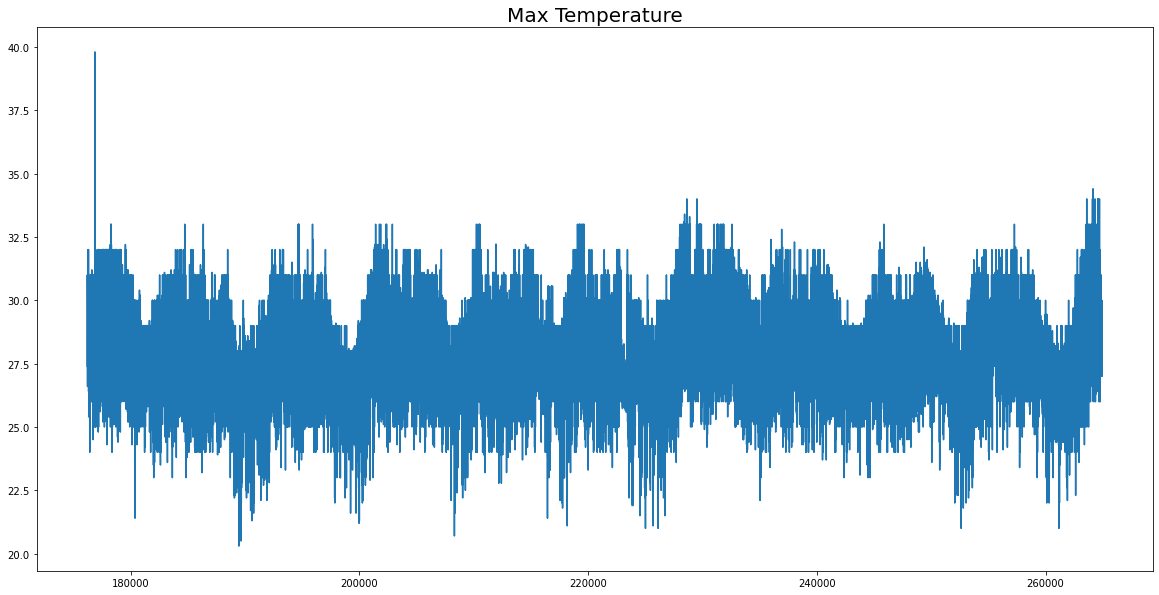

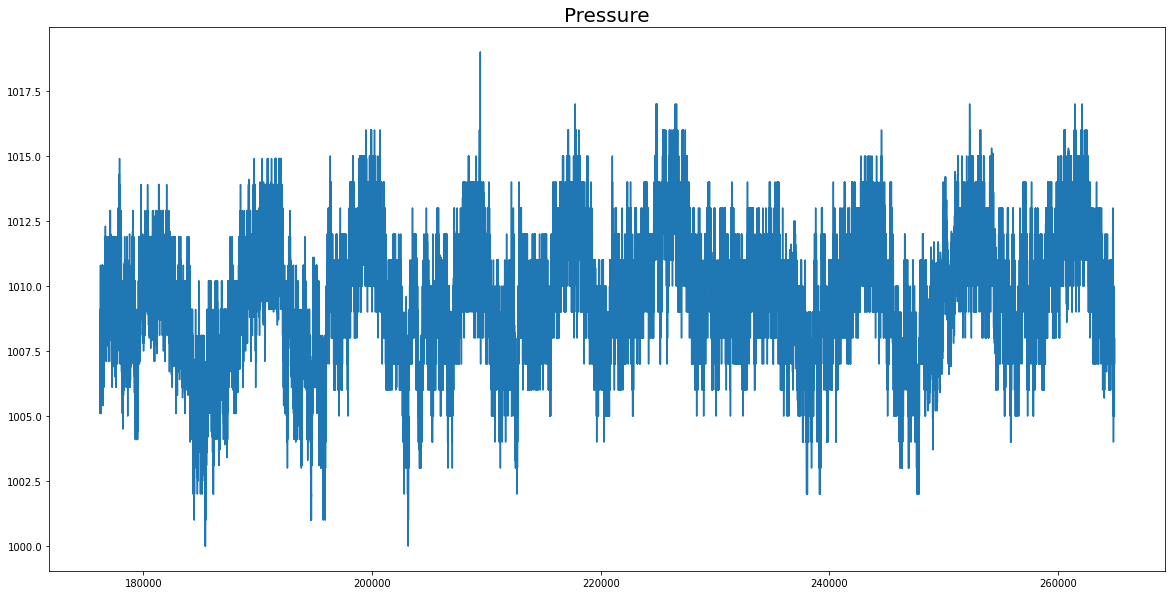

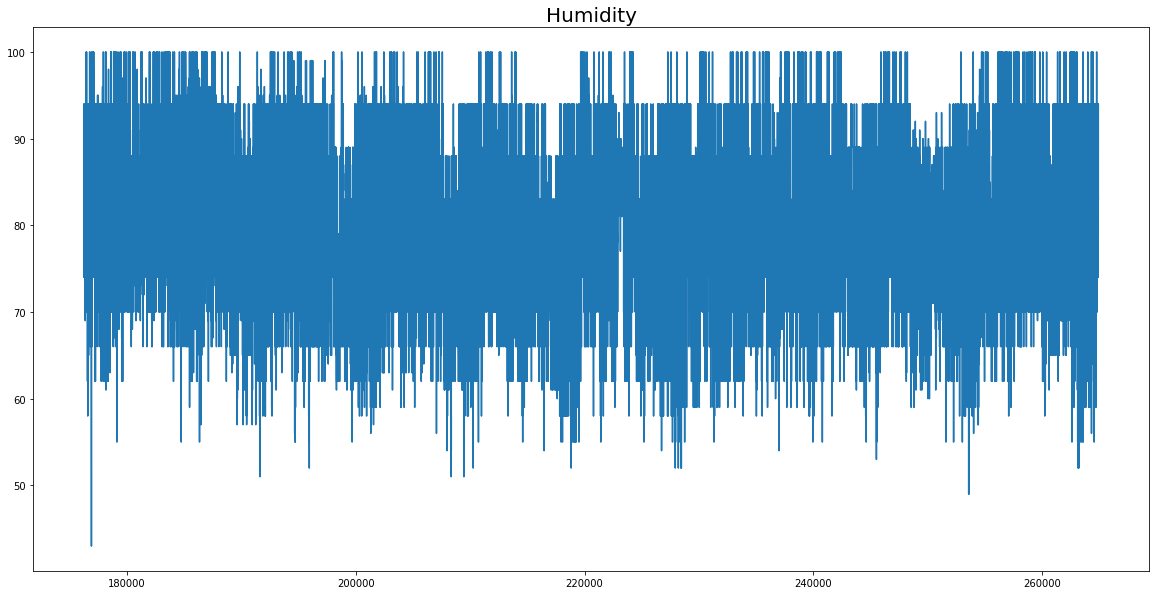

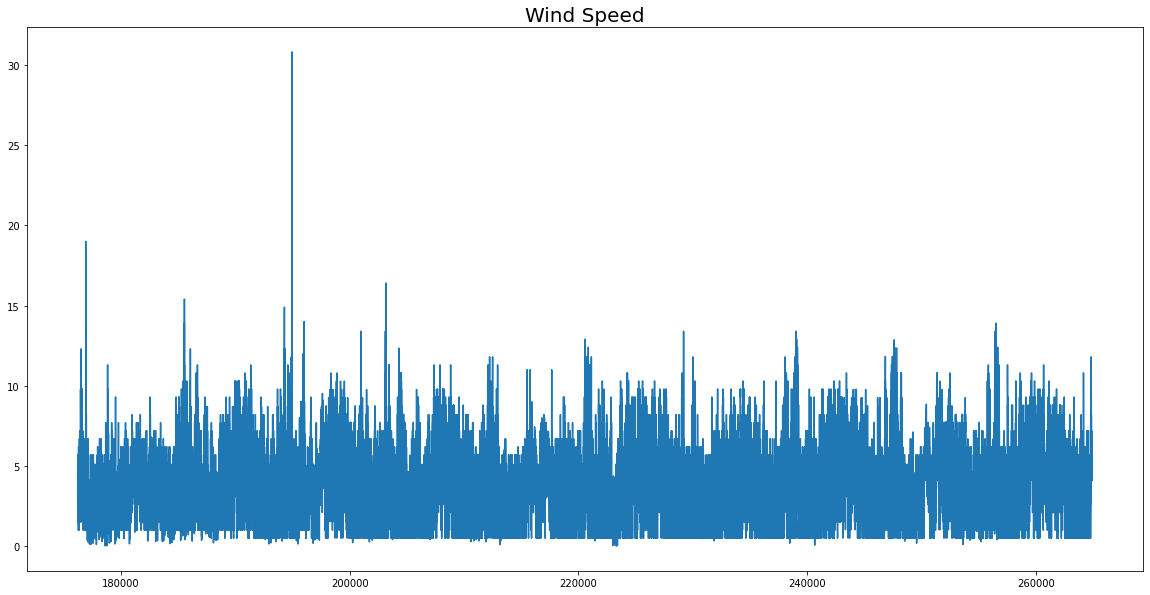

In [23]:
import matplotlib.pyplot as plt

temp = df['temp'].values
temp_min = df['temp_min'].values
temp_max = df['temp_max'].values
pressure = df['pressure'].values
humidity = df['humidity'].values
wind_speed = df['wind_speed'].values

plt.figure(figsize=(20,10))
plt.plot(df.index, temp)
plt.title('Temperature', fontsize=20)

plt.figure(figsize=(20,10))
plt.plot(df.index, temp_min)
plt.title('Min Temperature', fontsize=20)

plt.figure(figsize=(20,10))
plt.plot(df.index, temp_max)
plt.title('Max Temperature', fontsize=20)

plt.figure(figsize=(20,10))
plt.plot(df.index, pressure)
plt.title('Pressure', fontsize=20)

plt.figure(figsize=(20,10))
plt.plot(df.index, humidity)
plt.title('Humidity', fontsize=20)

plt.figure(figsize=(20,10))
plt.plot(df.index, wind_speed)
plt.title('Wind Speed', fontsize=20)

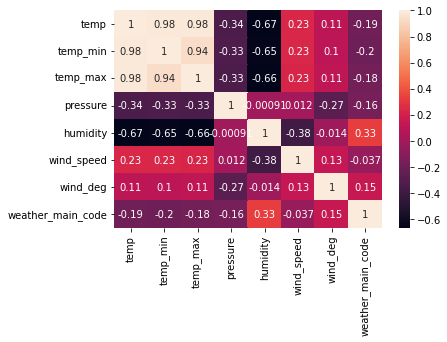

In [24]:
sns.heatmap(data=df.corr(),annot=True)

In [25]:
df1 = df[['temp', 'temp_min', 'temp_max', 'pressure','humidity', 'wind_speed']]
df1.shape

(88716, 6)

In [26]:
df1

,temp,temp_min,temp_max,pressure,humidity,wind_speed
176208,27.18,27.0,27.4,1007.9,87,3.1
176209,28.03,27.4,29.0,1008.1,83,3.1
176210,29.88,29.8,30.0,1008.1,74,4.6
176211,29.90,29.8,30.0,1008.1,79,3.6
176212,30.27,29.8,31.0,1007.1,74,4.1
...,...,...,...,...,...,...
264919,27.00,27.0,27.0,1007.0,94,4.1
264920,27.00,27.0,27.0,1007.0,94,5.7
264921,28.00,28.0,28.0,1007.0,83,6.7
264922,28.00,28.0,28.0,1007.0,83,6.2


In [27]:
t_shift = 1

In [28]:
dfy = df1.shift(-t_shift)
dfy

,temp,temp_min,temp_max,pressure,humidity,wind_speed
176208,28.03,27.4,29.0,1008.1,83.0,3.1
176209,29.88,29.8,30.0,1008.1,74.0,4.6
176210,29.90,29.8,30.0,1008.1,79.0,3.6
176211,30.27,29.8,31.0,1007.1,74.0,4.1
176212,30.64,30.4,31.0,1007.1,74.0,4.1
...,...,...,...,...,...,...
264919,27.00,27.0,27.0,1007.0,94.0,5.7
264920,28.00,28.0,28.0,1007.0,83.0,6.7
264921,28.00,28.0,28.0,1007.0,83.0,6.2
264922,28.00,28.0,28.0,1008.0,83.0,5.7


In [29]:
dfx = df1.values[0:-t_shift]
dfx
dfx.shape

(88715, 6)

In [30]:
dfy1 = dfy.values[:-t_shift]
dfy1
dfy1.shape

(88715, 6)

In [31]:
num_data = len(dfx)
num_data

88715

In [32]:
# train 80%
n_train = int(num_data * 0.8)
n_train

70972

In [33]:
n_test = num_data - n_train
n_test

17743

In [34]:
x_train = dfx[:n_train]
x_test = dfx[n_train:]
print('x_train : ', x_train)
print('x_test : ', x_test)
len(x_train) + len(x_test)

x_train :  [[  27.18   27.     27.4  1007.9    87.      3.1 ]
 [  28.03   27.4    29.   1008.1    83.      3.1 ]
 [  29.88   29.8    30.   1008.1    74.      4.6 ]
 ...
 [  30.89   30.7    31.   1005.     71.      5.14]
 [  29.92   29.8    30.   1005.     79.      5.14]
 [  29.93   29.8    30.   1005.     75.      5.14]]
x_test :  [[  29.3    29.     29.8  1005.     84.      4.12]
 [  28.77   28.4    29.   1006.     79.      3.6 ]
 [  28.13   28.     28.4  1007.     84.      4.12]
 ...
 [  27.     27.     27.   1007.     94.      5.7 ]
 [  28.     28.     28.   1007.     83.      6.7 ]
 [  28.     28.     28.   1007.     83.      6.2 ]]


88715

In [35]:
y_train = dfy1[:n_train]
y_test = dfy1[n_train:]
print('y_train : ', y_train)
print('y_test : ', y_test)
len(y_train) + len(y_test)

y_train :  [[  28.03   27.4    29.   1008.1    83.      3.1 ]
 [  29.88   29.8    30.   1008.1    74.      4.6 ]
 [  29.9    29.8    30.   1008.1    79.      3.6 ]
 ...
 [  29.92   29.8    30.   1005.     79.      5.14]
 [  29.93   29.8    30.   1005.     75.      5.14]
 [  29.3    29.     29.8  1005.     84.      4.12]]
y_test :  [[  28.77   28.4    29.   1006.     79.      3.6 ]
 [  28.13   28.     28.4  1007.     84.      4.12]
 [  28.15   28.     28.4  1007.     79.      3.09]
 ...
 [  28.     28.     28.   1007.     83.      6.7 ]
 [  28.     28.     28.   1007.     83.      6.2 ]
 [  28.     28.     28.   1008.     83.      5.7 ]]


88715

In [36]:
n_x_signals = dfx.shape[1]
n_x_signals

6

In [37]:
n_y_signals = dfy1.shape[1]
n_y_signals

6

In [39]:
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()

In [40]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [41]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [42]:
x_test_scaled = x_scaler.transform(x_test)

In [43]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [44]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(70972, 6)
(70972, 6)


In [45]:
x_train_scaled = x_train_scaled.reshape((x_train_scaled.shape[0], 1, x_train_scaled.shape[1]))
x_test_scaled = x_test_scaled.reshape((x_test_scaled.shape[0], 1, x_test_scaled.shape[1]))

print(x_train_scaled.shape, y_train_scaled.shape, x_test_scaled.shape, y_test_scaled.shape) 

(70972, 1, 6) (70972, 6) (17743, 1, 6) (17743, 6)


In [46]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(256, input_shape=(x_train_scaled.shape[1], x_train_scaled.shape[2])))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_y_signals))
model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               269312    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 302,982
Trainable params: 302,982
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(
    x_train_scaled, 
    y_train_scaled, 
    epochs=10, 
    batch_size=32, 
    validation_data=(x_test_scaled, y_test_scaled), 
    verbose=2, 
    shuffle=False)

Epoch 1/10
2218/2218 - 17s - loss: 0.0097 - val_loss: 0.0042 - 17s/epoch - 8ms/step
Epoch 2/10
2218/2218 - 16s - loss: 0.0034 - val_loss: 0.0031 - 16s/epoch - 7ms/step
Epoch 3/10
2218/2218 - 14s - loss: 0.0027 - val_loss: 0.0028 - 14s/epoch - 6ms/step
Epoch 4/10
2218/2218 - 16s - loss: 0.0025 - val_loss: 0.0028 - 16s/epoch - 7ms/step
Epoch 5/10
2218/2218 - 14s - loss: 0.0024 - val_loss: 0.0024 - 14s/epoch - 6ms/step
Epoch 6/10
2218/2218 - 14s - loss: 0.0024 - val_loss: 0.0024 - 14s/epoch - 6ms/step
Epoch 7/10
2218/2218 - 16s - loss: 0.0024 - val_loss: 0.0026 - 16s/epoch - 7ms/step
Epoch 8/10
2218/2218 - 14s - loss: 0.0024 - val_loss: 0.0024 - 14s/epoch - 7ms/step
Epoch 9/10
2218/2218 - 14s - loss: 0.0024 - val_loss: 0.0023 - 14s/epoch - 7ms/step
Epoch 10/10
2218/2218 - 14s - loss: 0.0024 - val_loss: 0.0023 - 14s/epoch - 6ms/step


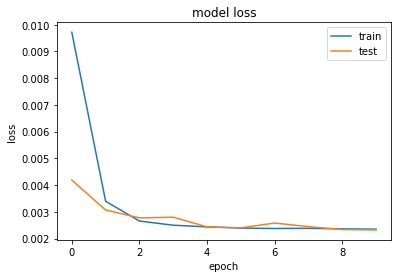

In [48]:
# grafik history untuk nilai loss dan val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


#### Prediksi

In [49]:
from sklearn.metrics import mean_squared_error,r2_score


yhat = model.predict(x_test_scaled)
x_test_scaled1 = x_test_scaled.reshape((x_test_scaled.shape[0], n_x_signals))
yhat

array([[0.6881641 , 0.8279321 , 0.46490192, 0.2661391 , 0.66069806,
        0.15738362],
       [0.6670527 , 0.8103713 , 0.4420613 , 0.32144058, 0.64462584,
        0.1356282 ],
       [0.64114493, 0.78854156, 0.41444063, 0.36807153, 0.6976977 ,
        0.1466162 ],
       ...,
       [0.5869422 , 0.74149656, 0.35809964, 0.36078298, 0.8037421 ,
        0.18877684],
       [0.6347515 , 0.7828452 , 0.407521  , 0.36225745, 0.6886472 ,
        0.2130639 ],
       [0.63449216, 0.78266317, 0.40725613, 0.36393994, 0.6905657 ,
        0.19998336]], dtype=float32)

In [50]:
x_test_scaled1

array([[0.69620253, 0.83333333, 0.48717949, 0.26315789, 0.71929825,
        0.1334849 ],
       [0.67039922, 0.80833333, 0.44615385, 0.31578947, 0.63157895,
        0.1165963 ],
       [0.63924051, 0.79166667, 0.41538462, 0.36842105, 0.71929825,
        0.1334849 ],
       ...,
       [0.5842259 , 0.75      , 0.34358974, 0.36842105, 0.89473684,
        0.18480026],
       [0.63291139, 0.79166667, 0.39487179, 0.36842105, 0.70175439,
        0.21727834],
       [0.63291139, 0.79166667, 0.39487179, 0.36842105, 0.70175439,
        0.2010393 ]])

#### Invers untuk forecast

In [51]:


inv_yhat = x_scaler.inverse_transform(yhat)
inv_yhat

array([[  29.134892 ,   28.87037  ,   29.365587 , 1005.05664  ,
          80.65979  ,    4.8558416],
       [  28.701262 ,   28.44891  ,   28.920195 , 1006.10736  ,
          79.743675 ,    4.1859922],
       [  28.169117 ,   27.924997 ,   28.381592 , 1006.99335  ,
          82.76877  ,    4.524313 ],
       ...,
       [  27.055794 ,   26.795918 ,   27.282944 , 1006.8549   ,
          88.8133   ,    5.8224387],
       [  28.037796 ,   27.788286 ,   28.24666  , 1006.8829   ,
          82.25289  ,    6.5702376],
       [  28.03247  ,   27.783915 ,   28.241495 , 1006.91486  ,
          82.36224  ,    6.1674876]], dtype=float32)

### Invert untuk nilai actual

In [52]:

y_test_scaled1 = y_test_scaled.reshape((len(y_test_scaled), n_y_signals))
inv_y = y_scaler.inverse_transform(y_test_scaled1)
inv_y

array([[  28.77,   28.4 ,   29.  , 1006.  ,   79.  ,    3.6 ],
       [  28.13,   28.  ,   28.4 , 1007.  ,   84.  ,    4.12],
       [  28.15,   28.  ,   28.4 , 1007.  ,   79.  ,    3.09],
       ...,
       [  28.  ,   28.  ,   28.  , 1007.  ,   83.  ,    6.7 ],
       [  28.  ,   28.  ,   28.  , 1007.  ,   83.  ,    6.2 ],
       [  28.  ,   28.  ,   28.  , 1008.  ,   83.  ,    5.7 ]])

#### Calculate RMSE

In [53]:

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print(f'Test RMSE: {rmse}')

Test RMSE: 1.9469984816366492


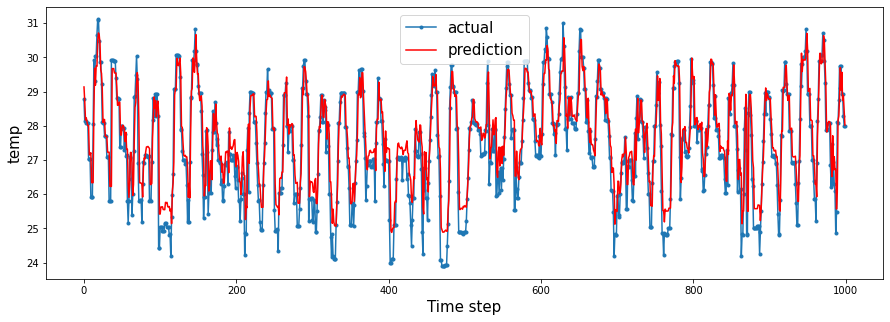

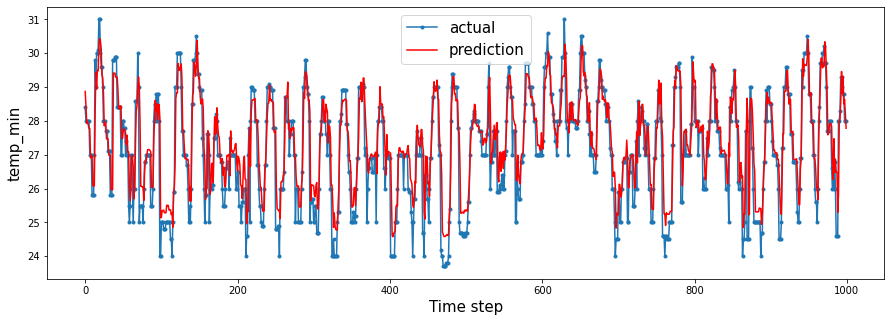

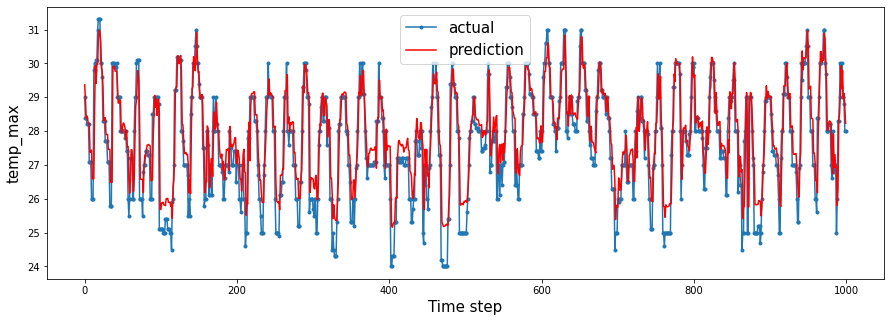

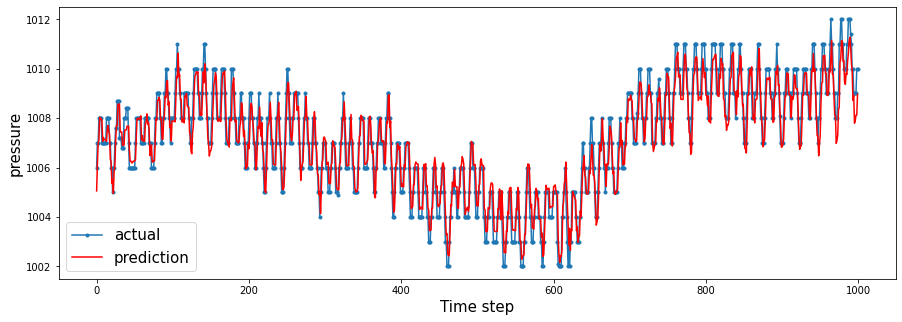

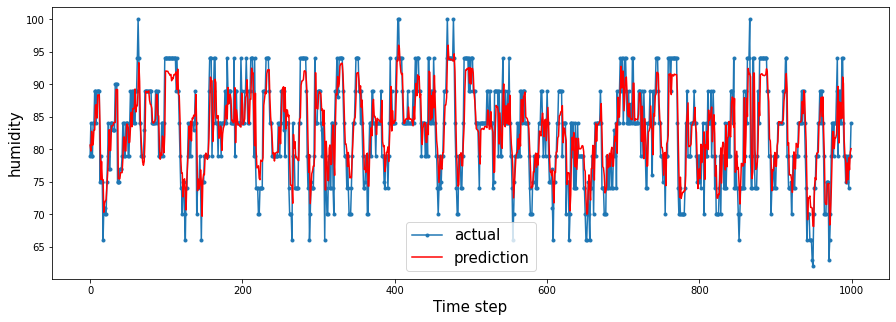

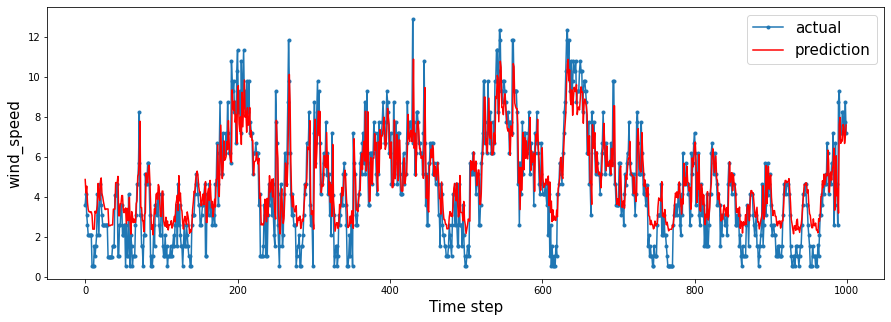

In [54]:
n = 1000
aa=[x for x in range(n)]

plt.figure(figsize=(15,5))
plt.plot(aa, inv_y[:n,-n_y_signals], marker='.', label="actual")
plt.plot(aa, inv_yhat[:n,-n_y_signals], 'r', label="prediction")
plt.ylabel('temp', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(aa, inv_y[:n,-n_y_signals + 1], marker='.', label="actual")
plt.plot(aa, inv_yhat[:n,-n_y_signals + 1], 'r', label="prediction")
plt.ylabel('temp_min', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(aa, inv_y[:n,-n_y_signals + 2], marker='.', label="actual")
plt.plot(aa, inv_yhat[:n,-n_y_signals + 2], 'r', label="prediction")
plt.ylabel('temp_max', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(aa, inv_y[:n,-n_y_signals + 3], marker='.', label="actual")
plt.plot(aa, inv_yhat[:n,-n_y_signals + 3], 'r', label="prediction")
plt.ylabel('pressure', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(aa, inv_y[:n,-n_y_signals + 4], marker='.', label="actual")
plt.plot(aa, inv_yhat[:n,-n_y_signals + 4], 'r', label="prediction")
plt.ylabel('humidity', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(aa, inv_y[:n,-n_y_signals + 5], marker='.', label="actual")
plt.plot(aa, inv_yhat[:n,-n_y_signals + 5], 'r', label="prediction")
plt.ylabel('wind_speed', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()